In [1]:
from chesslab.agent_tf import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
class Model_2():

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(3,3,4,1,8),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(8,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(3,3,4,8,16),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(16,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,4,16,32),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*4*32,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 4, 1])

        layer=0
        out = tf.nn.conv3d(out,self.hw[layer], strides=[1,1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv3d(out,self.hw[layer], strides=[1,1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv3d(out,self.hw[layer], strides=[1,1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*4*32])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_2()

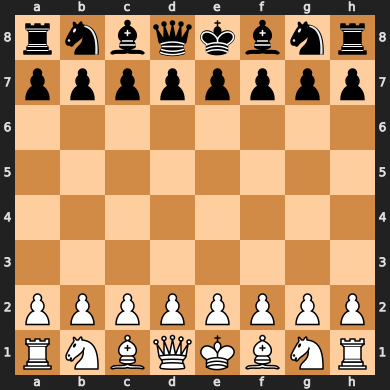

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/tf_elo.3.2.{}.h5'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Move.from_uci('d2d4')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.39372218, 0.52296966, 0.3995746 , 0.29240146, 0.3375869 ,
       0.4228837 , 0.47986072, 0.45208254, 0.45516756, 0.30497333,
       0.21180977, 0.37388128, 0.30446652, 0.35900405, 0.4093959 ,
       0.48577145, 0.57780915, 0.35783485, 0.31920096, 0.35346335],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 0.5778091549873352],
       [Move.from_uci('g1f3'), 0.522969663143158],
       [Move.from_uci('e2e4'), 0.48577144742012024],
       [Move.from_uci('f2f3'), 0.47986072301864624],
       [Move.from_uci('d2d3'), 0.4551675617694855],
       [Move.from_uci('e2e3'), 0.4520825445652008],
       [Move.from_uci('g2g3'), 0.42288368940353394],
       [Move.from_uci('f2f4'), 0.40939590334892273],
       [Move.from_uci('b1c3'), 0.3995746076107025],
       [Move.from_uci('g1h3'), 0.39372217655181885],
       [Move.from_uci('a2a3'), 0.3738812804222107],
       [Move.from_uci('g2g4'), 0.35900405049324036],
       [Move.from_uci('c2c4'), 0.3578348457813263],
       [Move.from_uci('a2a4'), 0.353463351726532],
       [Move.from_uci('h2h3'), 0.337586909532547],
       [Move.from_uci('b2b4'), 0.31920096278190613],
       [Move.from_uci('c2c3'), 0.3049733340740204],
       [Move.from_uci('h2h4'), 0.30446651577949524],
       [Move.from_uci('b1a3'), 0.2924014627933502],
       

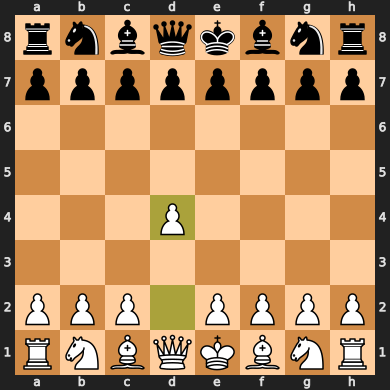

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.16

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 4/25 = 0.16 | weighted = 0.74
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 18 & 48 & 0.6383 & 0.5455 & g2g3 & 0.6664  \\
02 & f5d4 & 15 & 39 & 0.6316 & 0.7912 & a5d2 & 0.9239  \\
03 & e1d1 & 9 & 38 & 0.7838 & 0.9054 & b3b4 & 0.9560  \\
04 & b1b2 & 23 & 47 & 0.5217 & 0.7894 & b1d1 & 0.9260  \\
05 & g5c1 & 5 & 48 & 0.9149 & 0.7803 & h7h5 & 0.8520  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.7560 & a3c3 & 0.7604  \\
07 & b7e4 & 18 & 33 & 0.4688 & 0.2458 & f6h5 & 0.5424  \\
08 & h7h6 & 1 & 39 & 1.0000 & 0.8369 & h7h6 & 0.8369  \\
09 & f3e2 & 5 & 35 & 0.8824 & 0.7562 & h2h4 & 0.7915  \\
10 & d5c3 & 3 & 41 & 0.9500 & 0.5865 & g7g5 & 0.6592  \\
11 & g3f5 & 4 & 35 & 0.9118 & 0.4098 & d7g7 & 0.5988  \\
12 & c6d6 & 24 & 41 & 0.4250 & 0.4648 & b6d7 & 0.6664  \\
13 & c3d5 & 7 & 30 & 0.7931 & 0.4982 & d3c4 & 0.6258  \\
14 & b1b2 & 9 & 49 & 0.8333 & 0.4618 & b1e1 & 0.6002  \\
15 & d3f5 & 2 & 51 & 0.9800 & 0.7716 & e1e6 & 0.7958  \\
16 & b3b4 & 1 & 10 & 1.0000 & 0.1460 & b3

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.545530,g2g3,0.666378,18,48,0.638298
1,f5d4,0.791234,a5d2,0.923928,15,39,0.631579
2,e1d1,0.905440,b3b4,0.956005,9,38,0.783784
3,b1b2,0.789393,b1d1,0.925973,23,47,0.521739
4,g5c1,0.780302,h7h5,0.852018,5,48,0.914894
5,a3a2,0.756005,a3c3,0.760410,2,31,0.966667
6,b7e4,0.245785,f6h5,0.542367,18,33,0.468750
7,h7h6,0.836852,h7h6,0.836852,1,39,1.000000
8,f3e2,0.756182,h2h4,0.791498,5,35,0.882353
9,d5c3,0.586495,g7g5,0.659247,3,41,0.950000


In [13]:
epochs=30
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
train_acc_model = np.zeros(epochs)
test_acc_model = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    train_acc_model[i-1] = deepbot.history['train']['acc'][-1]
    test_acc_model[i-1] = deepbot.history['test']['acc'][-1]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GP

In [14]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,epochs)
ssp = np.repeat(ssp,epochs)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


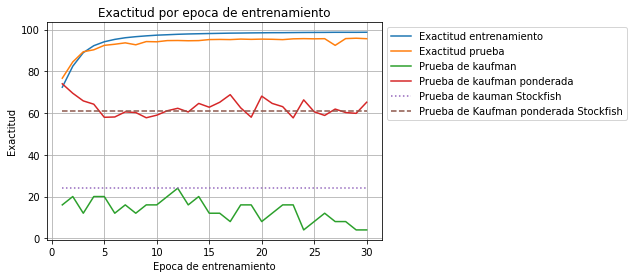

In [15]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [16]:
train_acc_model

array([0.72403109, 0.82487816, 0.88969302, 0.92306864, 0.94191206,
       0.95331627, 0.96118176, 0.9662624 , 0.97018737, 0.97350198,
       0.97554529, 0.97775972, 0.97929531, 0.98034245, 0.98139209,
       0.98230433, 0.98322785, 0.98366624, 0.98441148, 0.98488241,
       0.98538011, 0.98550534, 0.98599887, 0.98647273, 0.98671281,
       0.98686934, 0.98730648, 0.98726434, 0.98721379, 0.98754448])

In [17]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(epochs):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 72.40 & 76.73 & 16.00 & 74.04 \\
02 & 82.49 & 84.53 & 20.00 & 69.50 \\
03 & 88.97 & 89.40 & 12.00 & 65.85 \\
04 & 92.31 & 90.34 & 20.00 & 64.26 \\
05 & 94.19 & 92.47 & 20.00 & 57.98 \\
06 & 95.33 & 93.00 & 12.00 & 58.14 \\
07 & 96.12 & 93.67 & 16.00 & 60.58 \\
08 & 96.63 & 92.74 & 12.00 & 60.27 \\
09 & 97.02 & 94.28 & 16.00 & 57.76 \\
10 & 97.35 & 94.18 & 16.00 & 59.00 \\
11 & 97.55 & 94.75 & 20.00 & 61.11 \\
12 & 97.78 & 94.80 & 24.00 & 62.30 \\
13 & 97.93 & 94.68 & 16.00 & 60.53 \\
14 & 98.03 & 94.75 & 20.00 & 64.64 \\
15 & 98.14 & 95.24 & 12.00 & 62.82 \\
16 & 98.23 & 95.31 & 12.00 & 65.19 \\
17 & 98.32 & 95.23 & 8.00 & 68.83 \\
18 & 98.37 & 95.47 & 16.00 & 62.50 \\
19 & 98.44 & 95.35 & 16.00 & 58.03 \\
20 & 98.49 & 95.46 & 8.00 & 68.13 \\
21 & 98.54 & 95.38 & 12.00 & 64.64 \\
22 & 98.55 & 95.22 & 16.00 & 63.07 \\
23 & 98.60 & 95.59 & 16.00 & 57.70 \\
24 & 98.

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.724031,0.767259,0.16,0.740394
2,0.824878,0.845263,0.20,0.695028
3,0.889693,0.893965,0.12,0.658454
4,0.923069,0.903449,0.20,0.642645
5,0.941912,0.924728,0.20,0.579832
6,0.953316,0.930026,0.12,0.581391
7,0.961182,0.936674,0.16,0.605823
8,0.966262,0.927370,0.12,0.602697
9,0.970187,0.942787,0.16,0.577643
10,0.973502,0.941773,0.16,0.589979
